<a href="https://colab.research.google.com/github/Beneroms/Sales_Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [4]:
# import csv file
df = pd.read_csv('Sales Data.csv', encoding='latin-1') # try using 'latin-1' encoding

In [5]:
df.shape

(11251, 15)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
#check for null values
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [10]:
# drop null values
df.dropna(inplace=True)

In [11]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

Exploratory Data Analysis

Gender

<ipython-input-13-48fbacdc6ee0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df, palette='Set2')  # You can choose 'Set2', 'Set3', or any other palette


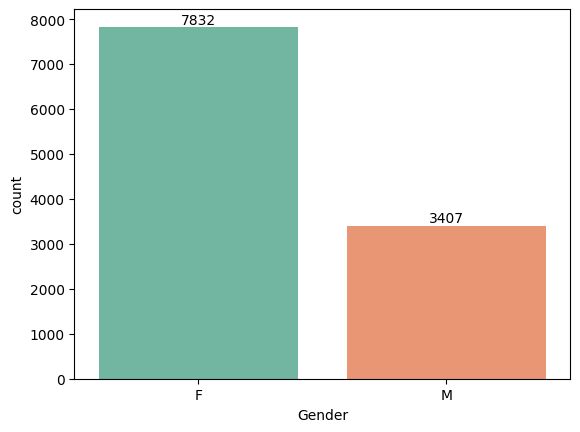

In [13]:
# Create the bar chart with unique colors
ax = sns.countplot(x='Gender', data=df, palette='Set2')  # You can choose 'Set2', 'Set3', or any other palette

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.show()

<ipython-input-14-bc009c4b6a67>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette=unique_colors)
<ipython-input-14-bc009c4b6a67>:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette=unique_colors)


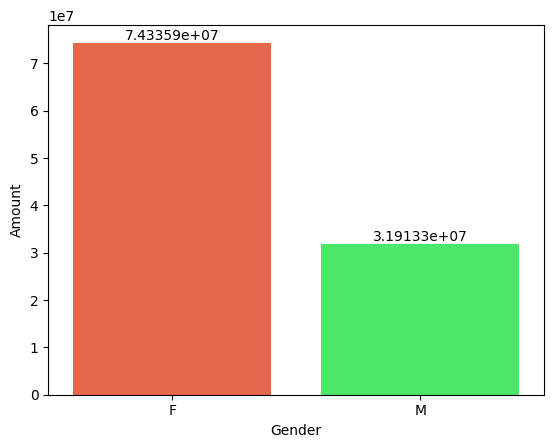

In [14]:
# Summing the 'Amount' by 'Gender'
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Define unique colors for each gender
unique_colors = ['#FF5733', '#33FF57', '#3357FF']  # Replace with your preferred color codes

# Create the bar chart with the specified colors
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette=unique_colors)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.show()

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

Age

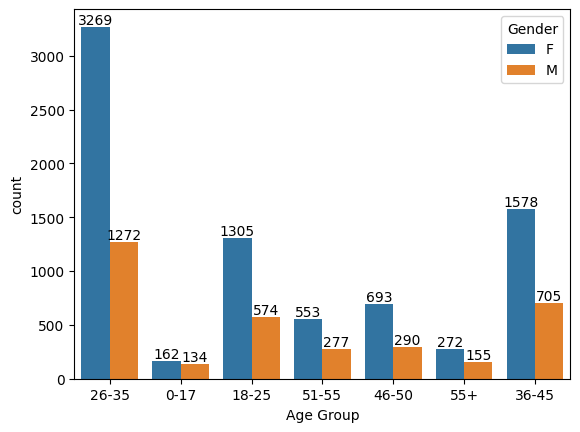

In [15]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

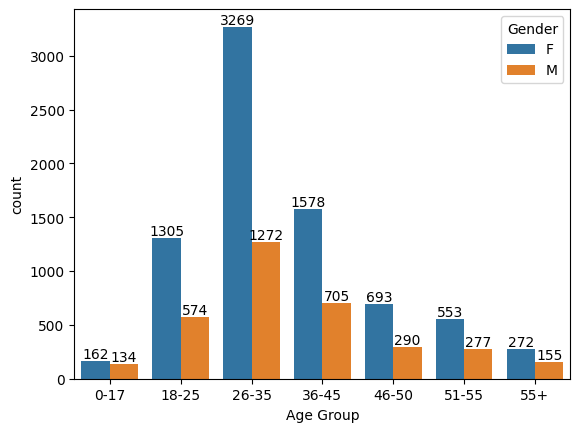

In [16]:
# Assuming your 'Age Group' values can be sorted alphabetically
age_order = sorted(df['Age Group'].unique())

# Create the bar chart with the specified order for the x-axis
ax = sns.countplot(data=df, x='Age Group', hue='Gender', order=age_order)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.show()

<ipython-input-17-58d96073bce9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Age Group', y='Amount', data=sales_age, palette=unique_colors)


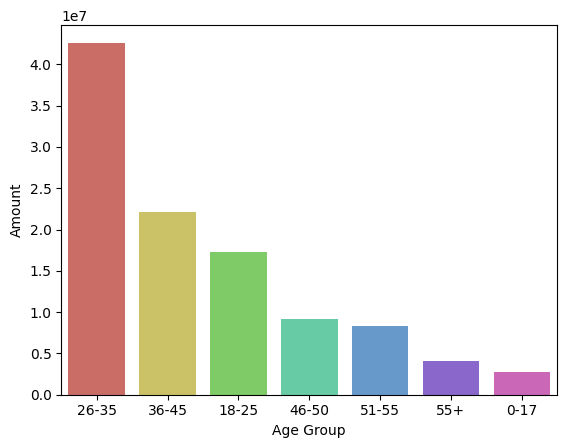

In [17]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Define unique colors for each age group
num_age_groups = len(sales_age['Age Group'].unique())
unique_colors = sns.color_palette('hls', num_age_groups) # Generate a palette with enough colors

# Create the barplot with unique colors
ax = sns.barplot(x='Age Group', y='Amount', data=sales_age, palette=unique_colors)

# (Optional) Add labels to the bars
# for bars in ax.containers:
#    ax.bar_label(bars)

plt.show()

# Total number of orders from top 10 states


<ipython-input-18-0535083ed499>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State', y = 'Orders', palette=unique_colors);


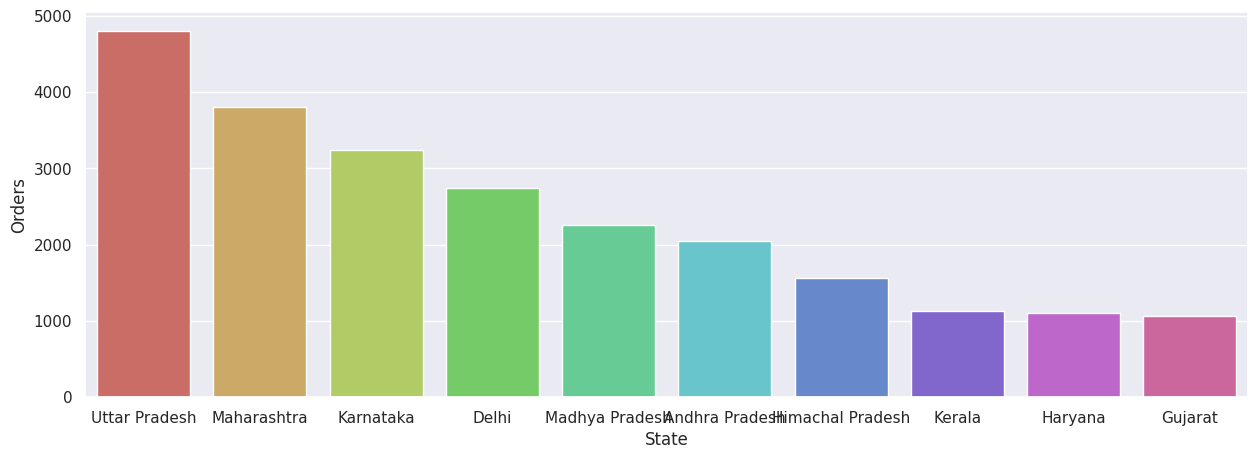

In [18]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})

# Generate a color palette with 10 unique colors
unique_colors = sns.color_palette('hls', 10)

# Create the barplot with unique colors
sns.barplot(data = sales_state, x = 'State', y = 'Orders', palette=unique_colors);

# Total amount/sales from top 10 states


<Axes: xlabel='State', ylabel='Amount'>

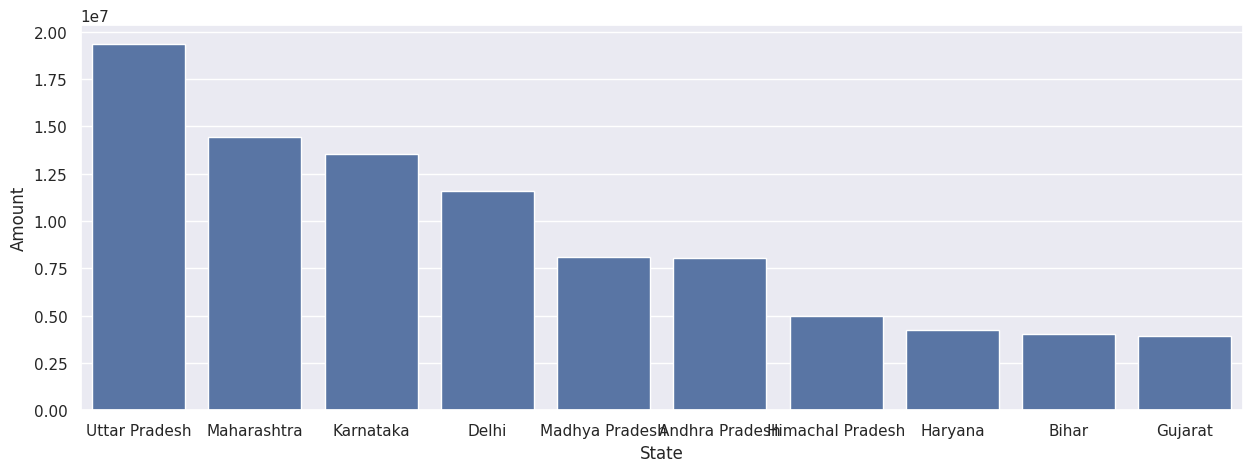

In [19]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

<ipython-input-20-39708acbbb20>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State', y = 'Amount', palette=unique_colors)


<Axes: xlabel='State', ylabel='Amount'>

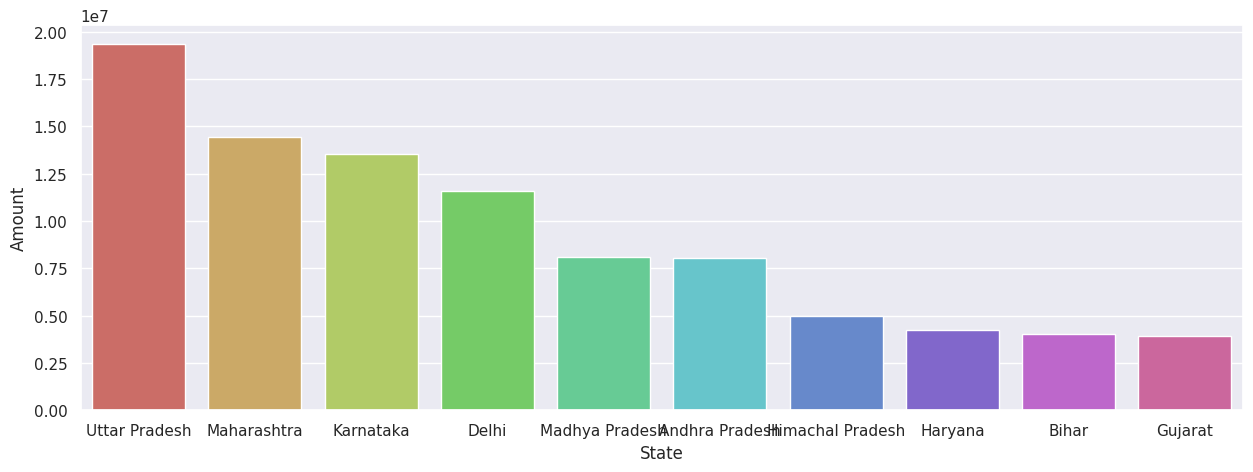

In [20]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})

# Generate a color palette with 10 unique colors
unique_colors = sns.color_palette('hls', 10)

# Create the barplot with unique colors
sns.barplot(data = sales_state, x = 'State', y = 'Amount', palette=unique_colors)

Marital Status

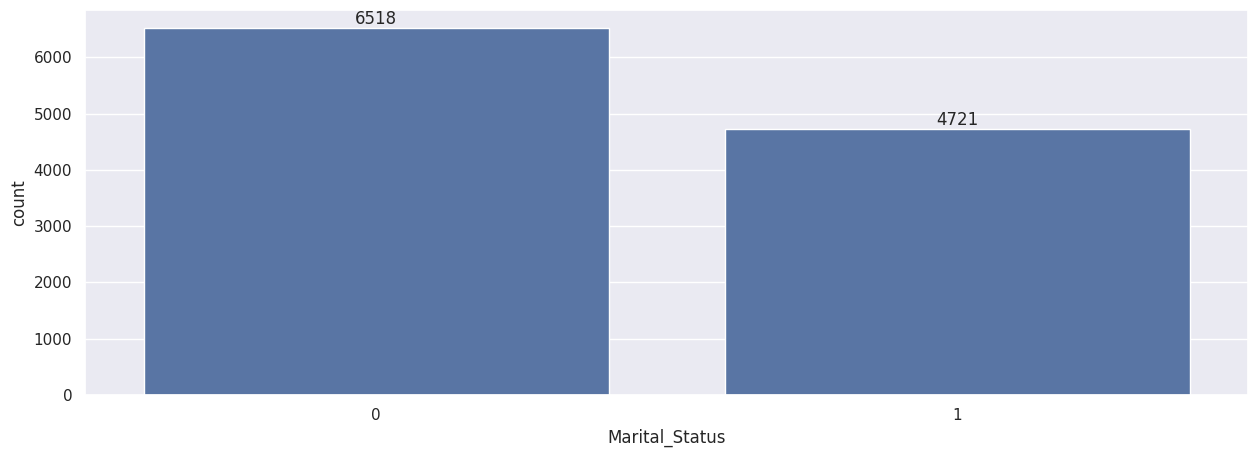

In [21]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<ipython-input-24-3f0ab7127e42>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Marital_Status', palette=custom_palette)


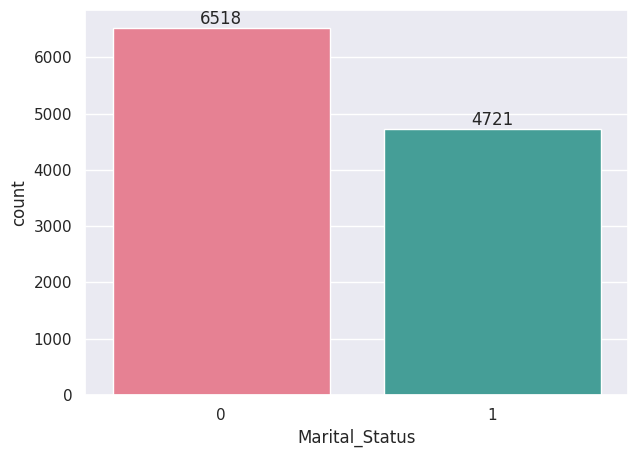

In [24]:
sns.set(rc={'figure.figsize':(7,5)})

# Define a custom palette with different colors for each bar
custom_palette = sns.color_palette("husl", df['Marital_Status'].nunique())  # Automatically generate unique colors

# Create the bar chart with the custom palette
ax = sns.countplot(data=df, x='Marital_Status', palette=custom_palette)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Show the pl

<Axes: xlabel='Marital_Status', ylabel='Amount'>

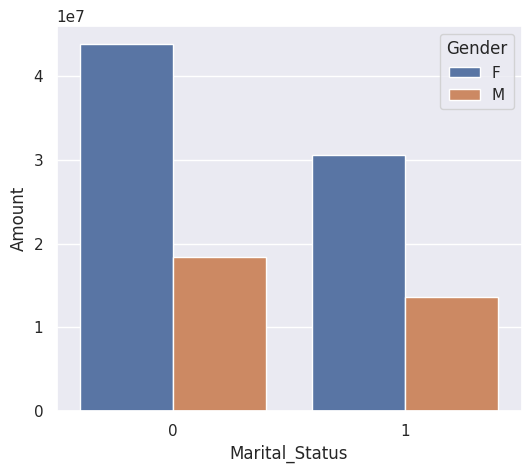

In [25]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

Occupation

<ipython-input-27-84f0be78d389>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Occupation', palette=custom_palette)


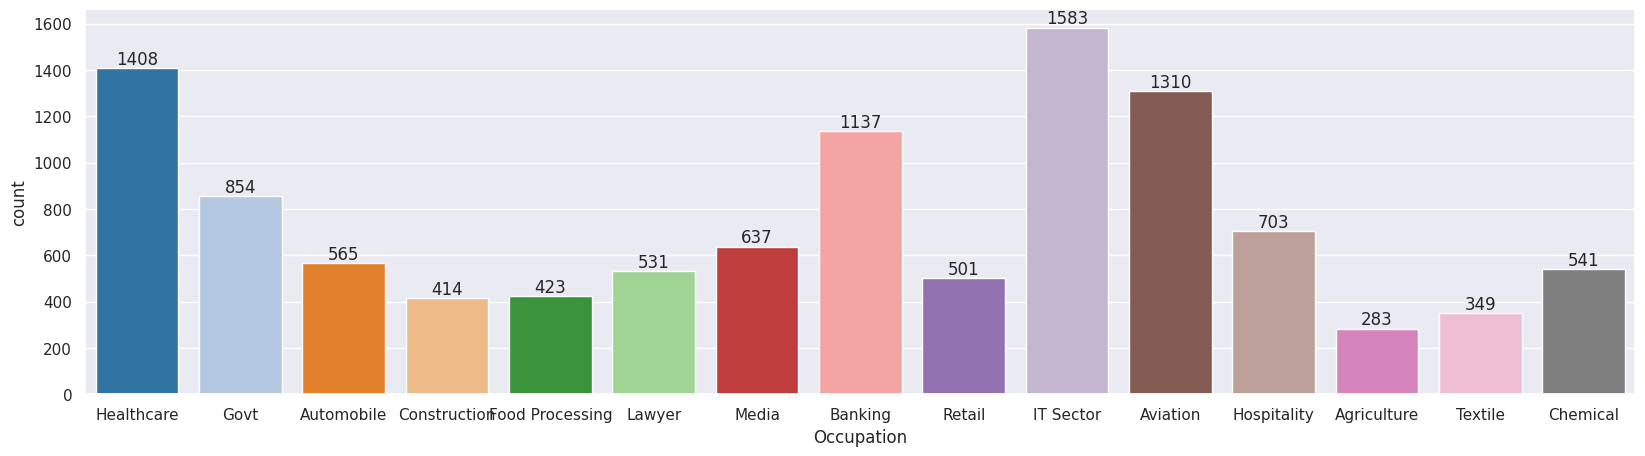

In [27]:
# Use a Seaborn palette that generates different colors for each bar
custom_palette = sns.color_palette("tab20", df['Occupation'].nunique())  # "tab20" is a palette with 20 distinct colors

# Create the bar chart with the custom palette
ax = sns.countplot(data=df, x='Occupation', palette=custom_palette)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.show()

<ipython-input-30-4ea21f3f1285>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_state, x='Occupation', y='Amount', palette=custom_palette)


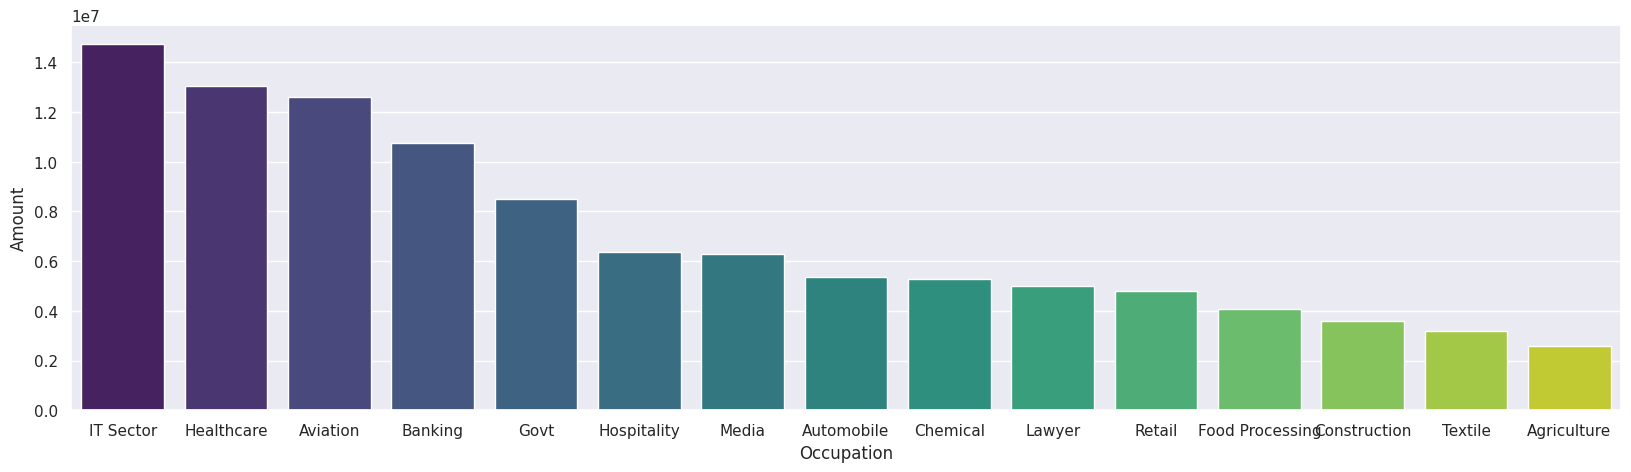

In [30]:
# Grouping the data by 'Occupation' and summing the 'Amount'
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Set the figure size
sns.set(rc={'figure.figsize':(20,5)})

# Create the bar chart with a custom color palette
custom_palette = sns.color_palette("viridis", len(sales_state))  # Using 'viridis' palette for a range of colors

ax = sns.barplot(data=sales_state, x='Occupation', y='Amount', palette=custom_palette)

# Show the plot
plt.show()

Product Category

<ipython-input-32-7a6b4b5fbc32>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Product_Category', palette=custom_palette)


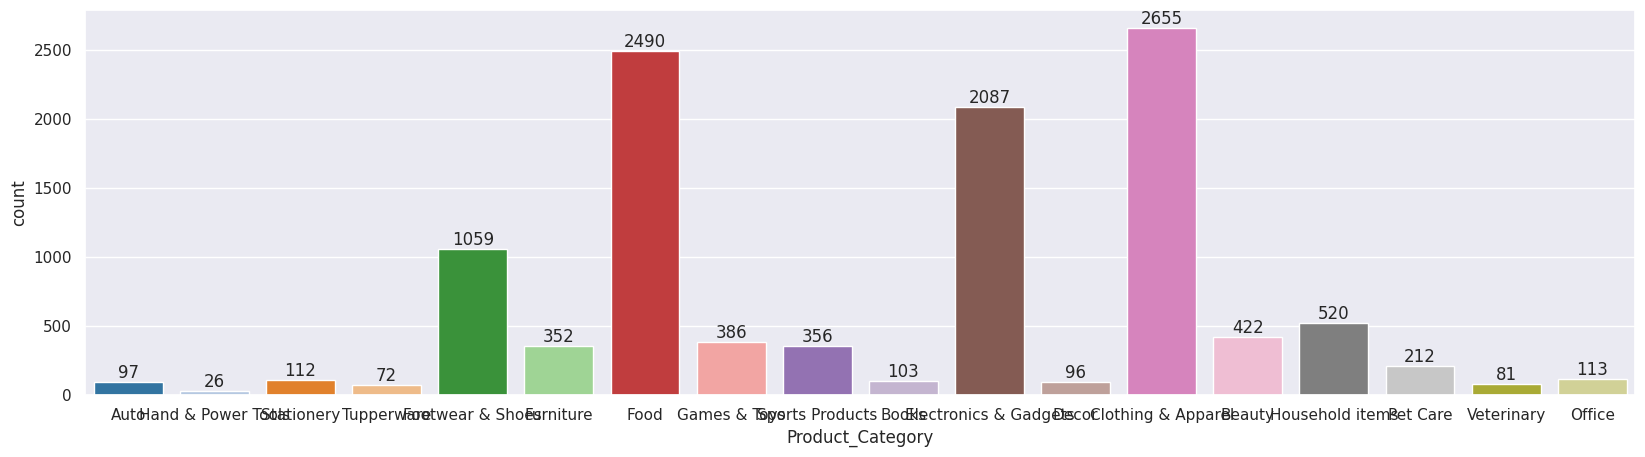

In [32]:
sns.set(rc={'figure.figsize':(20,5)})

# Create the count plot with a custom color palette
custom_palette = sns.color_palette("tab20", df['Product_Category'].nunique())  # 'tab20' provides up to 20 distinct colors

# Plot the count plot with the custom palette
ax = sns.countplot(data=df, x='Product_Category', palette=custom_palette)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.show()

<ipython-input-33-37c99cb3477a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount', palette=palette)


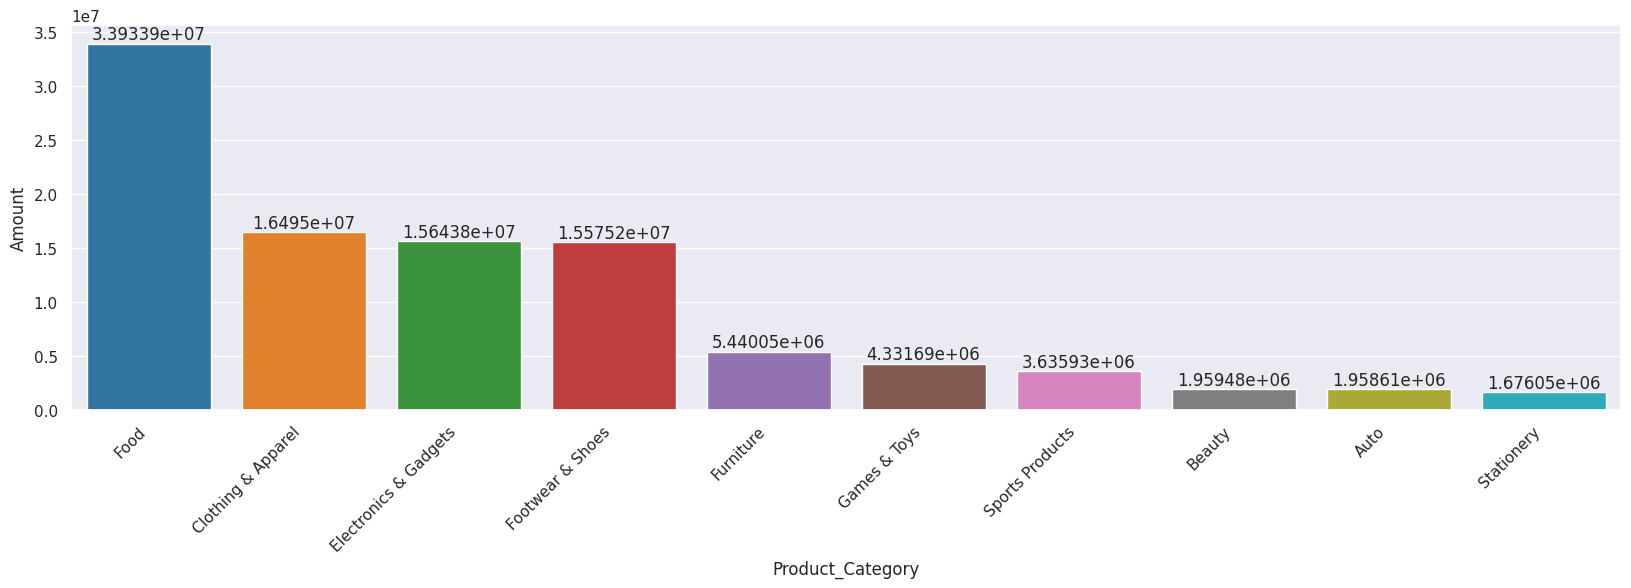

In [33]:
# Group by 'Product_Category' and sum 'Amount', then sort and get the top 10
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Set the figure size
sns.set(rc={'figure.figsize':(20,5)})

# Define a color palette with different colors for each bar
# Using 'tab10' palette for up to 10 distinct colors
palette = sns.color_palette("tab10", len(sales_state))

# Create the bar chart with the custom color palette
ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount', palette=palette)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()